In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import mplhep as hep
hep.style.use("CMS")
plt.rcParams['font.size'] = 14.0
from matplotlib.colors import Normalize, LogNorm

In [2]:
class histLoader:
    def __init__(self,path):
        self.path = path
        self.names = []
        for f in os.listdir(path):
            if '.coffea' in f:
                self.names.append(f.split(".")[0])
    def load(self,hname):
        return util.load(f"{self.path}/{hname}.coffea")

class histContainer:
    def __init__(self,path):
        self.histos, self.metadata = util.load(path)
    def load(self,hname):
        return self.histos[hname]
    
def hplot(h,overlay):
    axes = h.axes
    targ = None
    for a in axes:
        if a.name == overlay:
            targ = a
    if targ is None:
        print("can't find overlay axis!")
        return

In [4]:
hv5 = histLoader("../../outputs/sig/signal_v5_xcleanStudy_2018_aEM_histos/")
hv4 = histLoader("../../outputs/sig/signal_v4_2018_aEM_histos_noXcleanVars/")

# Summary Plots

In [4]:
outD = "plots_comparison/recoEfficiency/summary/"
os.makedirs(outD,exist_ok=True)

## Eff by $p_T$

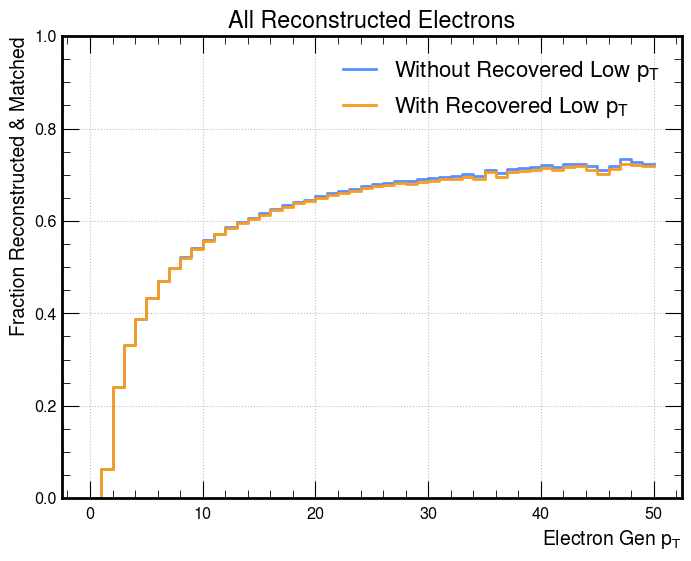

In [5]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt")[hsel][:pt_cut]
h4 = hv4.load("match_ele_gen_pt")[hsel][:pt_cut]
hg4 = hv4.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
hg5 = hv5.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]

eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
#plt.yscale('log')
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt.pdf")

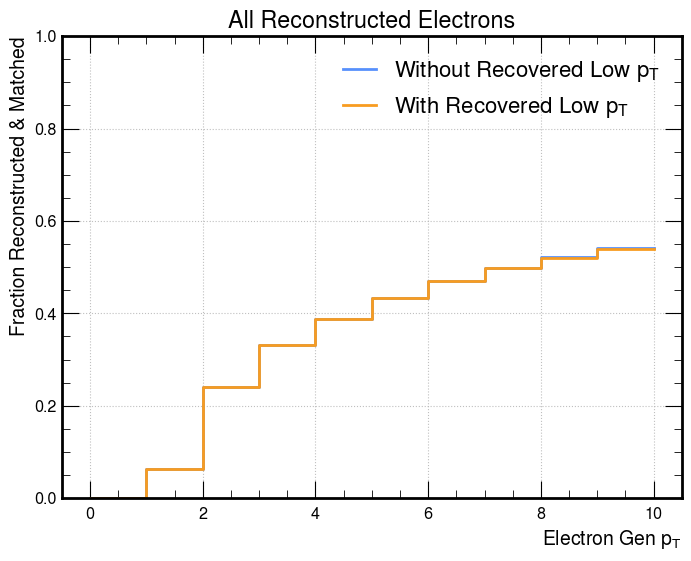

In [6]:
pt_cut = complex('10j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt")[hsel][:pt_cut]
h4 = hv4.load("match_ele_gen_pt")[hsel][:pt_cut]
hg4 = hv4.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
hg5 = hv5.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]

eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
#plt.yscale('log')
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_0to10.pdf")

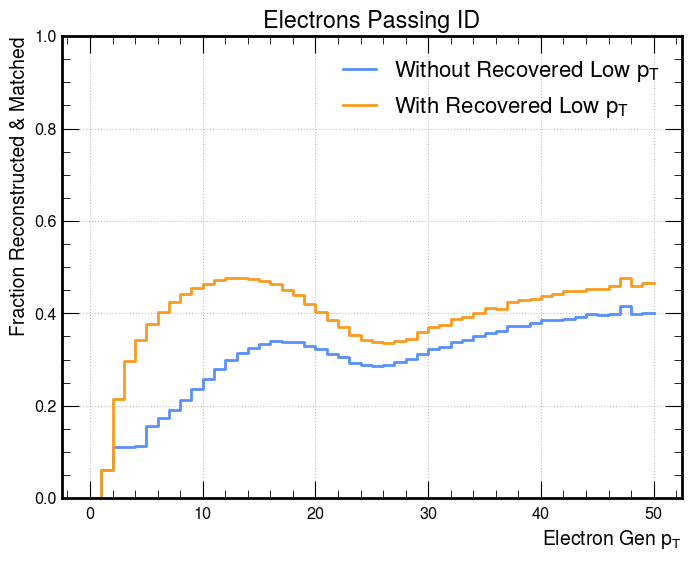

In [7]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt")[hsel][:pt_cut]
h4 = hv4.load("match_ele_gen_pt")[hsel][:pt_cut]
hg4 = hv4.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
hg5 = hv5.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]

eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
#plt.yscale('log')
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_passID.pdf")

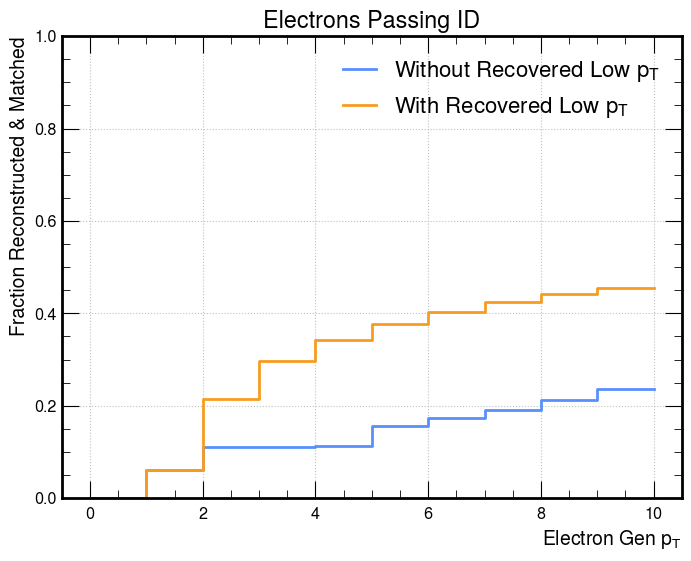

In [8]:
pt_cut = complex('10j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt")[hsel][:pt_cut]
h4 = hv4.load("match_ele_gen_pt")[hsel][:pt_cut]
hg4 = hv4.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]
hg5 = hv5.load("gen_ele_pt")[{"cut":'no_presel','samp':sum}][:pt_cut]

eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(f"Electron Gen $p_T$")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
#plt.yscale('log')
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_passID_0to10.pdf")

## By $L_{xy}$

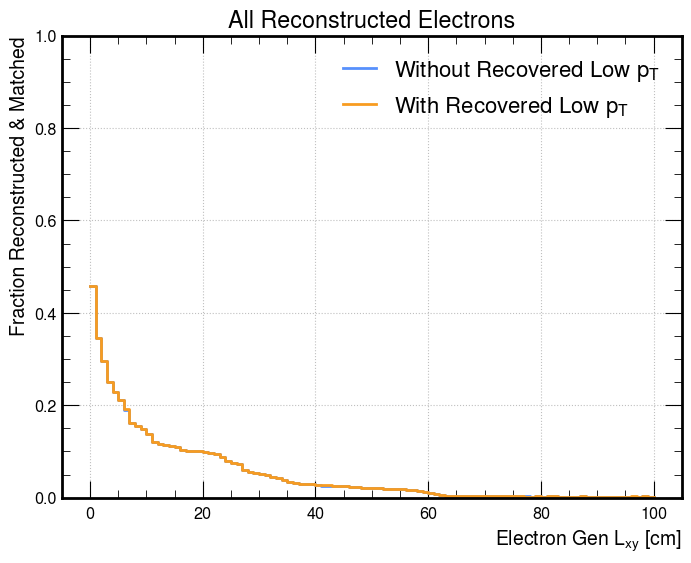

In [9]:
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_vxy100")[hsel]
hg4 = hv4.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}]

eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.title("All Reconstructed Electrons")
plt.ylim([0,1])
#plt.yscale('log')
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy.pdf")

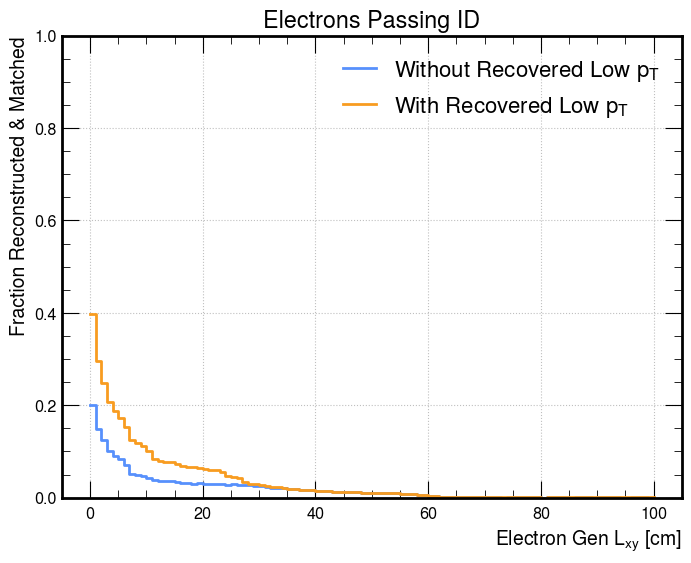

In [10]:
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_vxy100")[hsel]
hg4 = hv4.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_vxy100")[{"cut":'no_presel','samp':sum}]

eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.title("Electrons Passing ID")
plt.ylim([0,1])
#plt.yscale('log')
plt.legend(fontsize=16)
plt.grid()
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_passID.pdf")

## $p_T$ effs in Lxy bins

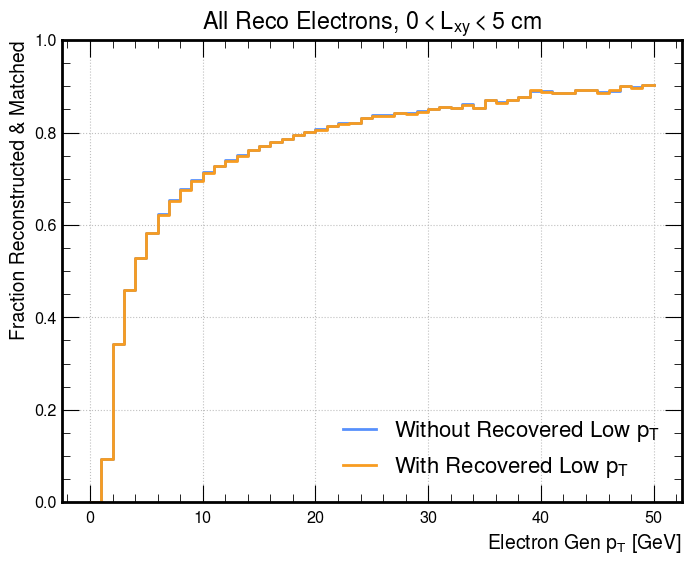

In [11]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 0j
lxyhi = 5j

h4 = h4[ptlo:pthi,lxylo:lxyhi:sum]
hg4 = hg4[ptlo:pthi,lxylo:lxyhi:sum]
h5 = h5[ptlo:pthi,lxylo:lxyhi:sum]
hg5 = hg5[ptlo:pthi,lxylo:lxyhi:sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy0to5.pdf")

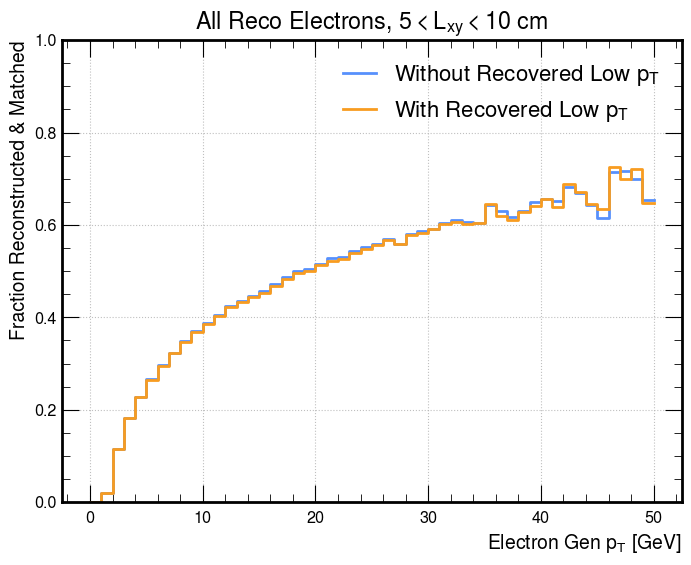

In [12]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 5j
lxyhi = 10j

h4 = h4[ptlo:pthi,lxylo:lxyhi:sum]
hg4 = hg4[ptlo:pthi,lxylo:lxyhi:sum]
h5 = h5[ptlo:pthi,lxylo:lxyhi:sum]
hg5 = hg5[ptlo:pthi,lxylo:lxyhi:sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy5to10.pdf")

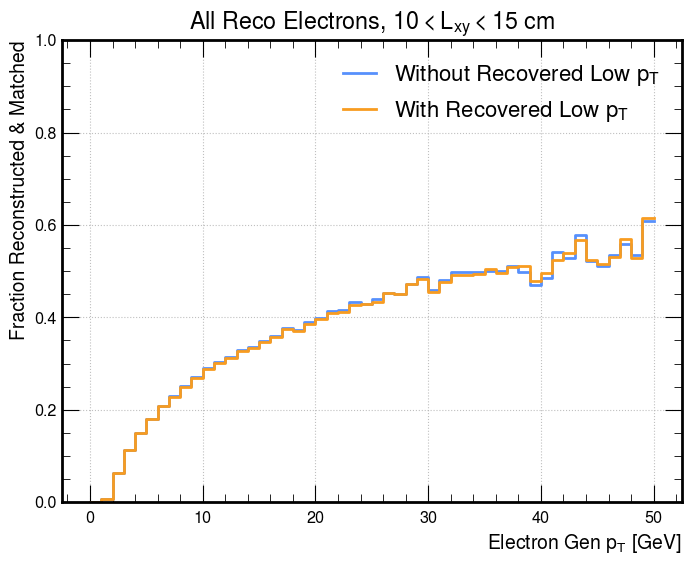

In [13]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 10j
lxyhi = 15j

h4 = h4[ptlo:pthi,lxylo:lxyhi:sum]
hg4 = hg4[ptlo:pthi,lxylo:lxyhi:sum]
h5 = h5[ptlo:pthi,lxylo:lxyhi:sum]
hg5 = hg5[ptlo:pthi,lxylo:lxyhi:sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy10to15.pdf")

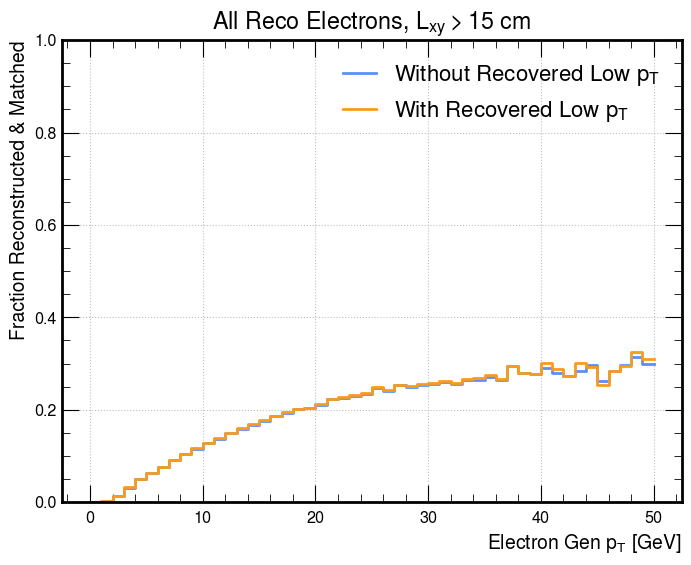

In [14]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 15j

h4 = h4[ptlo:pthi,lxylo::sum]
hg4 = hg4[ptlo:pthi,lxylo::sum]
h5 = h5[ptlo:pthi,lxylo::sum]
hg5 = hg5[ptlo:pthi,lxylo::sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $L_{{xy}} > {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy15toInf.pdf")

## Lxy effs in pT bins

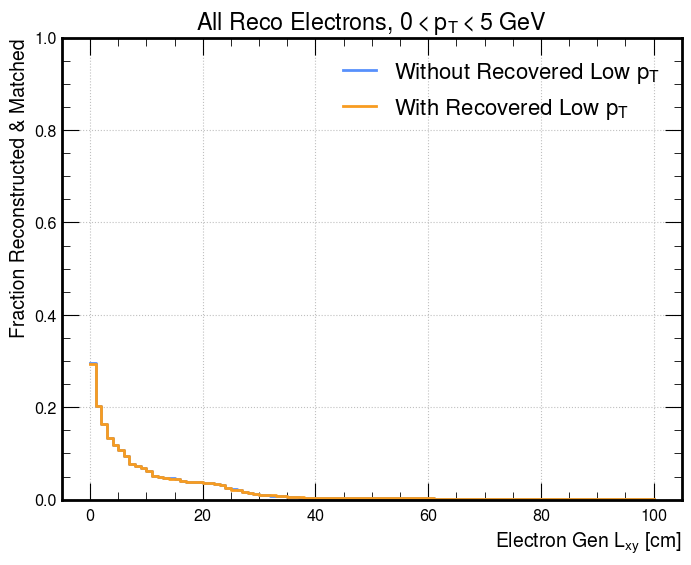

In [15]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 5j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo:pthi:sum,lxylo:lxyhi]
hg4 = hg4[ptlo:pthi:sum,lxylo:lxyhi]
h5 = h5[ptlo:pthi:sum,lxylo:lxyhi]
hg5 = hg5[ptlo:pthi:sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt0to5.pdf")

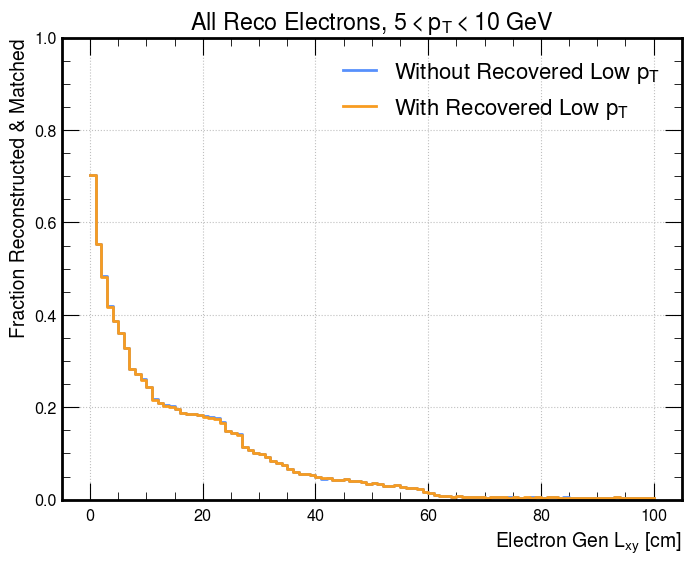

In [16]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 5j
pthi = 10j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo:pthi:sum,lxylo:lxyhi]
hg4 = hg4[ptlo:pthi:sum,lxylo:lxyhi]
h5 = h5[ptlo:pthi:sum,lxylo:lxyhi]
hg5 = hg5[ptlo:pthi:sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt5to10.pdf")

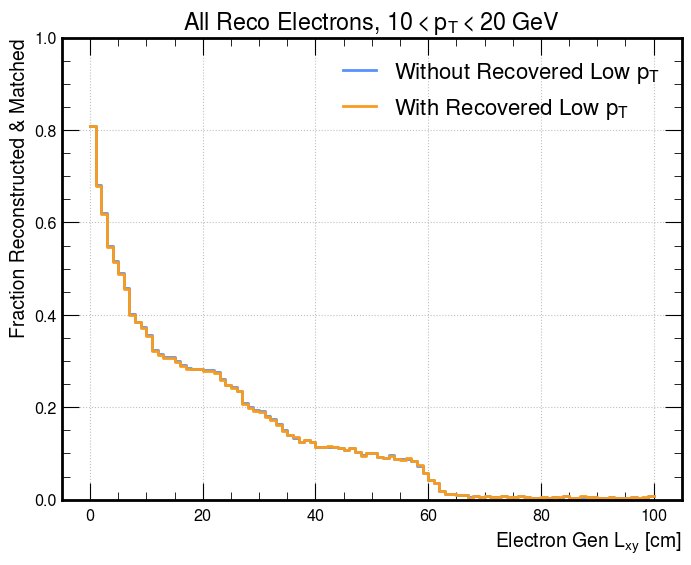

In [17]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 10j
pthi = 20j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo:pthi:sum,lxylo:lxyhi]
hg4 = hg4[ptlo:pthi:sum,lxylo:lxyhi]
h5 = h5[ptlo:pthi:sum,lxylo:lxyhi]
hg5 = hg5[ptlo:pthi:sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt10to20.pdf")

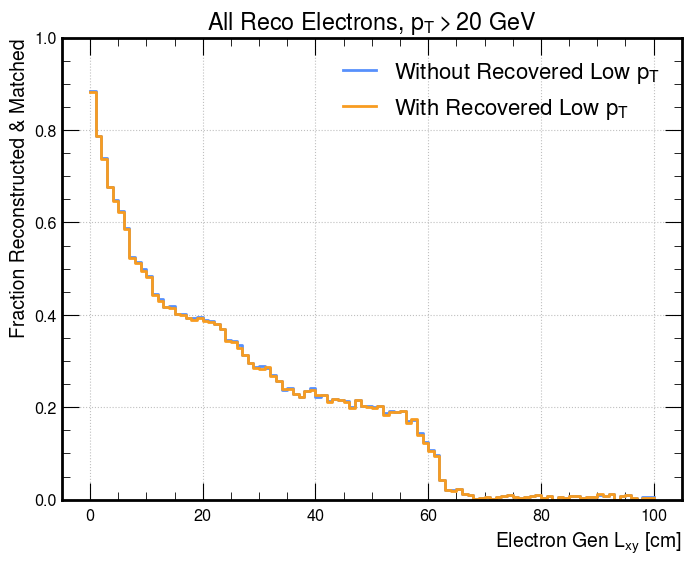

In [18]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':sum,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 20j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo::sum,lxylo:lxyhi]
hg4 = hg4[ptlo::sum,lxylo:lxyhi]
h5 = h5[ptlo::sum,lxylo:lxyhi]
hg5 = hg5[ptlo::sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"All Reco Electrons, $p_T > {ptlo.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt20toInf.pdf")

## $p_T$ effs in Lxy bins -- pass ID

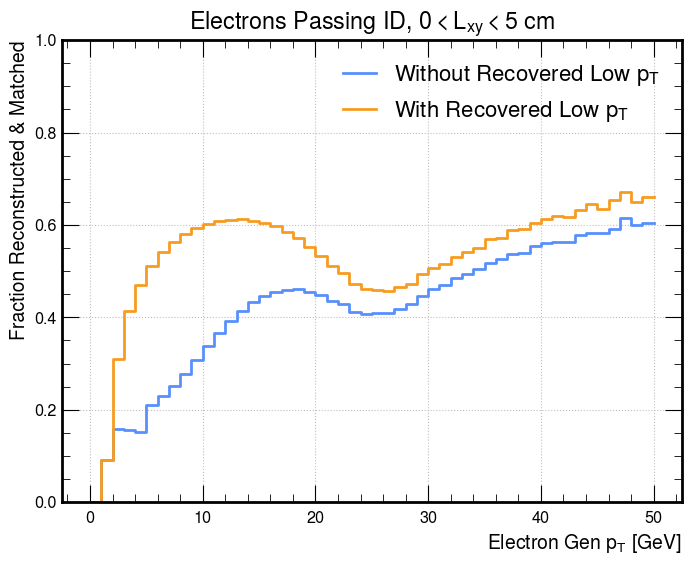

In [19]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 0j
lxyhi = 5j

h4 = h4[ptlo:pthi,lxylo:lxyhi:sum]
hg4 = hg4[ptlo:pthi,lxylo:lxyhi:sum]
h5 = h5[ptlo:pthi,lxylo:lxyhi:sum]
hg5 = hg5[ptlo:pthi,lxylo:lxyhi:sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy0to5_passID.pdf")

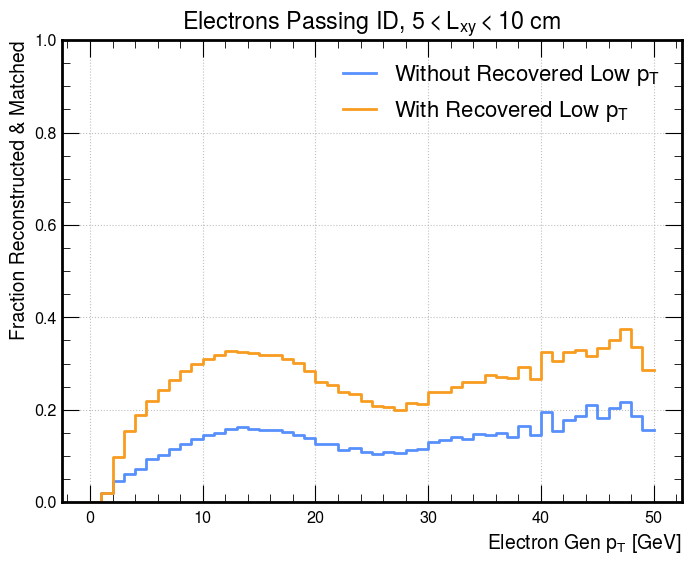

In [20]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 5j
lxyhi = 10j

h4 = h4[ptlo:pthi,lxylo:lxyhi:sum]
hg4 = hg4[ptlo:pthi,lxylo:lxyhi:sum]
h5 = h5[ptlo:pthi,lxylo:lxyhi:sum]
hg5 = hg5[ptlo:pthi,lxylo:lxyhi:sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy5to10_passID.pdf")

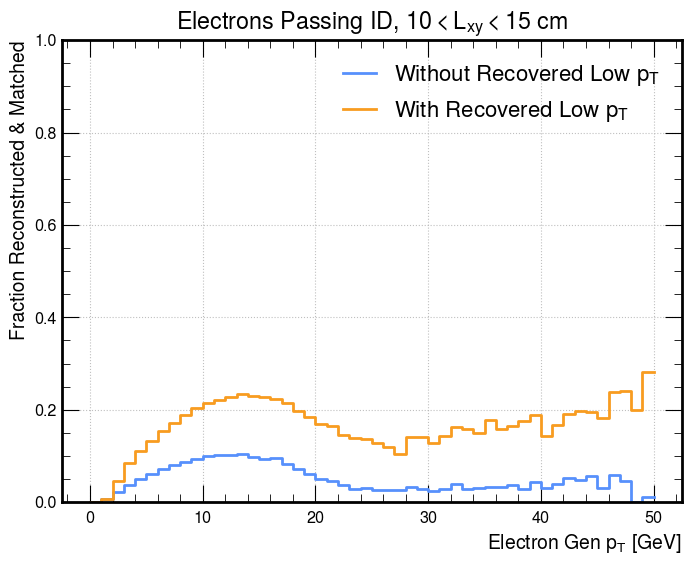

In [21]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 10j
lxyhi = 15j

h4 = h4[ptlo:pthi,lxylo:lxyhi:sum]
hg4 = hg4[ptlo:pthi,lxylo:lxyhi:sum]
h5 = h5[ptlo:pthi,lxylo:lxyhi:sum]
hg5 = hg5[ptlo:pthi,lxylo:lxyhi:sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${lxylo.imag:.0f} < L_{{xy}} < {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy10to15_passID.pdf")

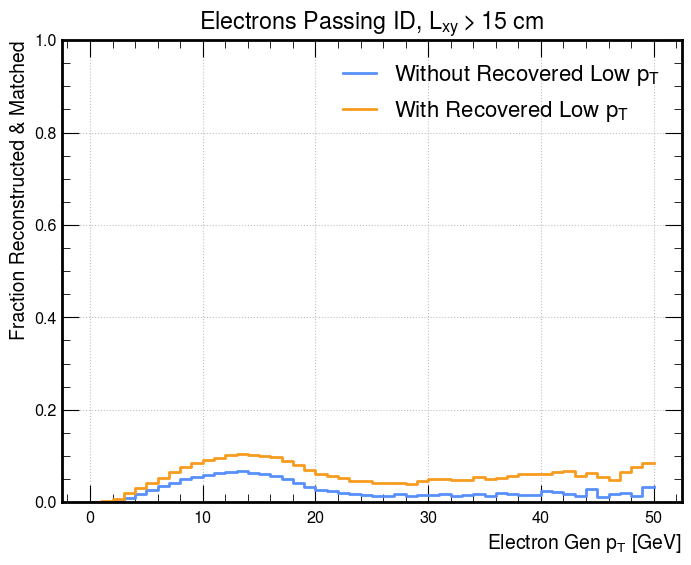

In [22]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 50j
lxylo = 15j

h4 = h4[ptlo:pthi,lxylo::sum]
hg4 = hg4[ptlo:pthi,lxylo::sum]
h5 = h5[ptlo:pthi,lxylo::sum]
hg5 = hg5[ptlo:pthi,lxylo::sum]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $p_T$ [GeV]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, $L_{{xy}} > {lxyhi.imag:.0f}$ cm")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_pt_lxy15toInf_passID.pdf")

## Lxy effs in pT bins -- pass ID

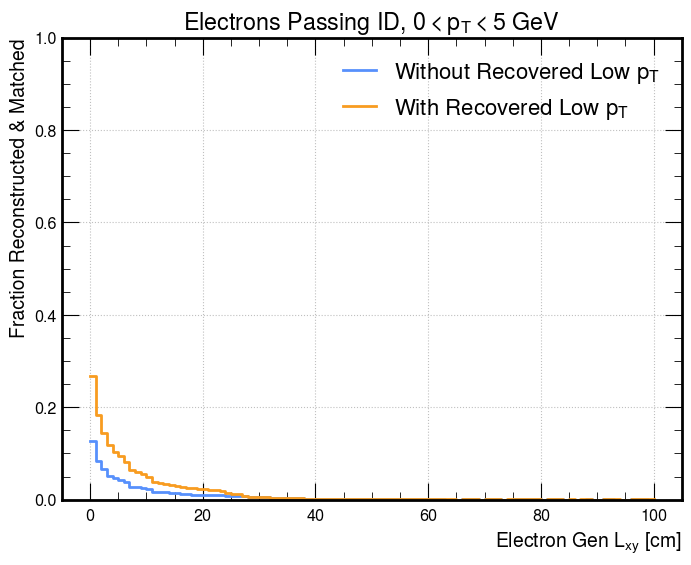

In [23]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 0j
pthi = 5j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo:pthi:sum,lxylo:lxyhi]
hg4 = hg4[ptlo:pthi:sum,lxylo:lxyhi]
h5 = h5[ptlo:pthi:sum,lxylo:lxyhi]
hg5 = hg5[ptlo:pthi:sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt0to5_passID.pdf")

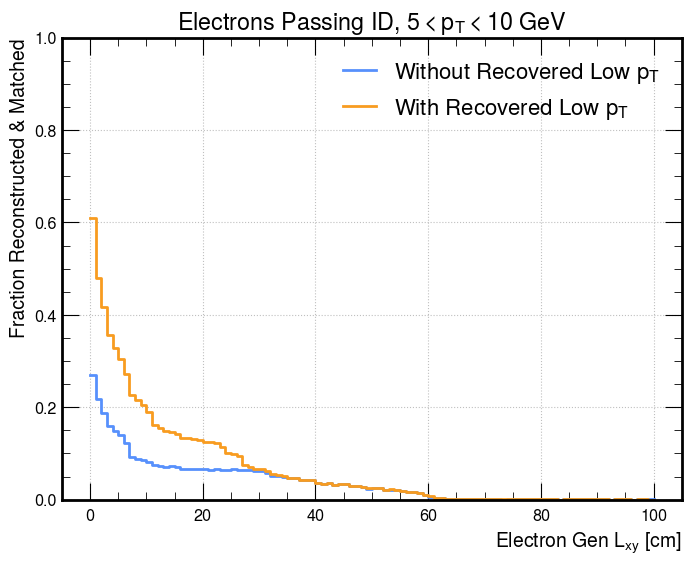

In [24]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 5j
pthi = 10j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo:pthi:sum,lxylo:lxyhi]
hg4 = hg4[ptlo:pthi:sum,lxylo:lxyhi]
h5 = h5[ptlo:pthi:sum,lxylo:lxyhi]
hg5 = hg5[ptlo:pthi:sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt5to10_passID.pdf")

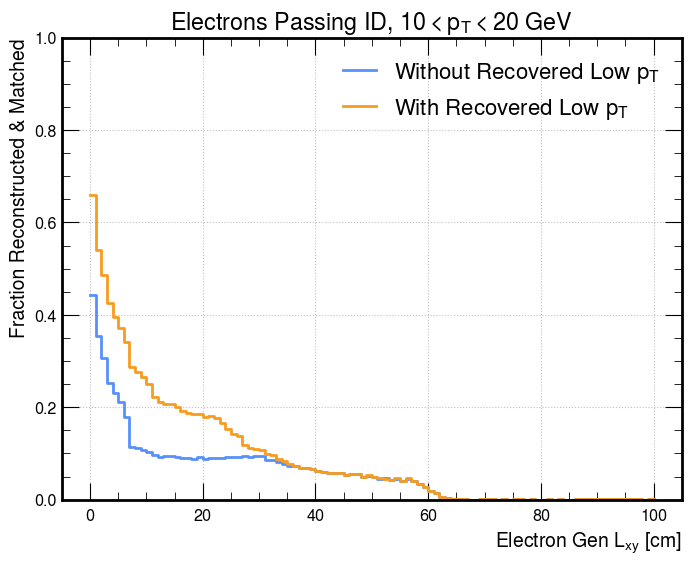

In [25]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 10j
pthi = 20j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo:pthi:sum,lxylo:lxyhi]
hg4 = hg4[ptlo:pthi:sum,lxylo:lxyhi]
h5 = h5[ptlo:pthi:sum,lxylo:lxyhi]
hg5 = hg5[ptlo:pthi:sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, ${ptlo.imag:.0f} < p_T < {pthi.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt10to20_passID.pdf")

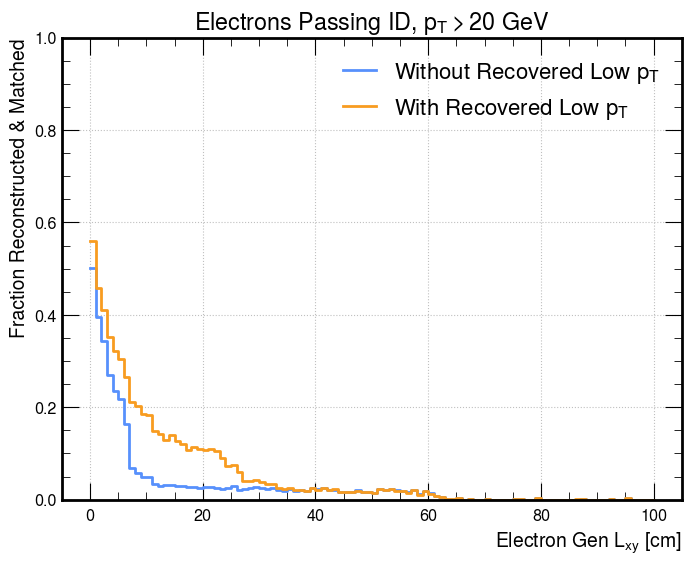

In [26]:
pt_cut = complex('50j')
hsel = {"cut":"no_presel","samp":sum,'passID':1,'match_type':sum}

h5 = hv5.load("match_ele_gen_pt_vs_vxy100")[hsel]
h4 = hv4.load("match_ele_gen_pt_vs_vxy100")[hsel]
hg4 = hv4.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]
hg5 = hv5.load("gen_ele_pt_vs_vxy100")[{"cut":'no_presel','samp':sum}]

ptlo = 20j
lxylo = 0j
lxyhi = 100j

h4 = h4[ptlo::sum,lxylo:lxyhi]
hg4 = hg4[ptlo::sum,lxylo:lxyhi]
h5 = h5[ptlo::sum,lxylo:lxyhi]
hg5 = hg5[ptlo::sum,lxylo:lxyhi]


eff4 = h4.values()/hg4.values()
eff4 = np.append(eff4,eff4[-1])
eff5 = h5.values()/hg5.values()
eff5 = np.append(eff5,eff5[-1])
edges = hg4.axes[0].edges

plt.figure(figsize=(8,6))
#hep.histplot([h4,h5],label=["With Recovered Low $p_T$","Without Recovered Low $p_T$"])
plt.step(edges,eff4,where='post',label="Without Recovered Low $p_T$",color="C0",lw=2)
plt.step(edges,eff5,where='post',label="With Recovered Low $p_T$",color="C1",lw=2)

plt.ylabel("Fraction Reconstructed & Matched")
plt.xlabel(r"Electron Gen $L_{xy}$ [cm]")
plt.ylim([0,1])
plt.legend(fontsize=16)
plt.grid()
plt.title(rf"Electrons Passing ID, $p_T > {ptlo.imag:.0f}$ GeV")
plt.savefig(f"{outD}/comparison_allSamples_recoEff_by_lxy_pt20toInf_passID.pdf")

## Events where all electrons/vertices as matched

In [8]:
hv5.names

['gen_met',
 'gen_dR',
 'gen_vxy1',
 'gen_vxy10',
 'gen_vxy100',
 'gen_leadpT',
 'gen_vtx_METdPhi',
 'gen_jetMETdPhi',
 'gen_vtx_mass',
 'gen_vtx_pt',
 'gen_vtx_eta',
 'gen_vtx_phi',
 'gen_met_unwgt',
 'gen_dR_unwgt',
 'gen_vxy1_unwgt',
 'gen_vxy10_unwgt',
 'gen_vxy100_unwgt',
 'gen_leadpT_unwgt',
 'gen_vtx_METdPhi_unwgt',
 'gen_jetMETdPhi_unwgt',
 'gen_vtx_mass_unwgt',
 'gen_vtx_pt_unwgt',
 'gen_vtx_eta_unwgt',
 'gen_vtx_phi_unwgt',
 'gen_ele_pt',
 'gen_ele_eta',
 'gen_ele_phi',
 'gen_ele_vxy1',
 'gen_ele_vxy10',
 'gen_ele_vxy100',
 'gen_ele_pt_vs_vxy1',
 'gen_ele_pt_vs_vxy10',
 'gen_ele_pt_vs_vxy100',
 'gen_ele_pt_vs_dR',
 'gen_ele_dR_vs_vxy1',
 'gen_ele_dR_vs_vxy10',
 'gen_ele_dR_vs_vxy100',
 'gen_ele_r3',
 'gen_ele_r3_PVcorr',
 'signalReco_vs_vtxMatch',
 'signalReco_vs_vtxMatch_unwgt',
 'match_ele_pt',
 'match_ele_eta',
 'match_ele_phi',
 'match_ele_dxy',
 'match_ele_dxySignif',
 'match_ele_trkChi2',
 'match_ele_trkProb',
 'match_ele_trkRelIso',
 'match_ele_calRelIso',
 'match_ele_

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f58b617c970>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f58b617dc90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

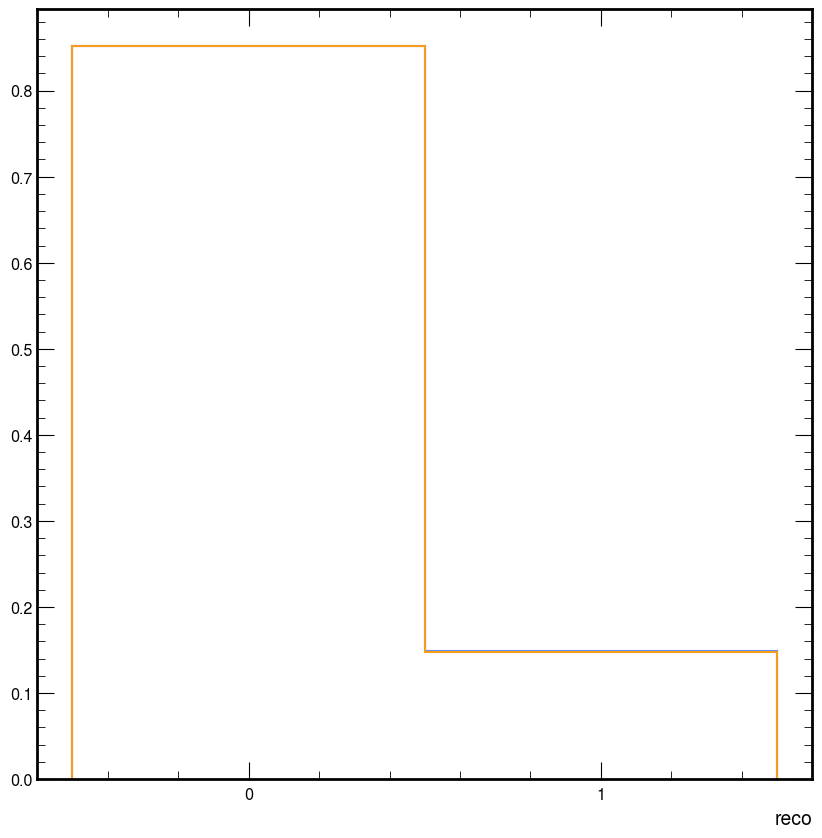

In [13]:
h4 = hv4.load("signalReco_vs_vtxMatch_unwgt")[{'cut':'no_presel','samp':sum}]
h5 = hv5.load("signalReco_vs_vtxMatch_unwgt")[{'cut':'no_presel','samp':sum}]

hep.histplot([h4[{'match':sum}],h5[{'match':sum}]],density=True)

In [10]:
h4

Hist(
  IntCategory([0, 1], name='reco'),
  IntCategory([0, 1], name='match'),
  storage=Weight()) # Sum: WeightedSum(value=2.93054e+07, variance=2.93054e+07)